# SocialStock Data Analysis

This notebook has the following objectives:

1) find equilibrium time in IncDistr vs time plot <br>
2) visualize the social network each day of the simulation <br>
3) show histogram about opinion sum and companies' indexes <br>
4) find equilibrium time in opinions vs time plot

In [13]:
# SETTING THE PARAMETERS
companies=3
op_range=5
users=100

gamma = 2.5

In [14]:
# IMPORTING LIBRARIES
import networkx as nx
import pandas as pd

import numpy as np
#from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 1) Equilibrium time in IncDistr vs time plot 

In [16]:
from pathlib import Path
d = Path().resolve().parent 
print(str(d))

/Users/Cinus/University/Magistrale_Sistemi_Complessi_Torino/MAS/GitHub/SocialStock


In [52]:
# IMPORTING DATASET FOR 1) AND 2)
from pathlib import Path
d = Path().resolve().parent 
data = str(d) + "/data/c"+str(companies)+"r"+str(op_range)+"n"+str(users)
print(data)
file = open( data + "Int.txt")

tit = file.readline()

X = []
nn = {}

for l in file.readlines() :
    #print(line)
    line = l.split(":")
    #print(line)
    #print(line[0:4])
    line[0:4] = [int(i) for i in line[0:4]]
    line[4] = line[4][1:-2].split(", ")
    
    ############DELAING WITH 0-DEGREE USERS#####
    if line[4][0] == "" :
        line[4] = []
    else : 
        line[4] = [int(i) for i in line[4]]
    ############################################

    X.append(line[0:4])
    nn[ (line[0],line[1]) ] = line[4]

X = np.array(X)
X = pd.DataFrame(X) 

tit = tit.split("-")[:-1]
X.columns = tit
X.sort_values(["uDays" , "ind"])

X1 = X[X.uDays==1]

uDays = int(X.shape[0]/users)
Deg = np.array(X1.sort_values("ind").deg)

##nearest_neighbours[4]

#dizionario dei nearest neighbours nel quarto giorno
#si hanno tante key-value pairs quante gli user

# key : indice dello user
# value : lista con gli indici della callout list 
nearest_neighbours = {}

for d in range(uDays) :
    nearest_neighbours[d+1] = {}
    for u in range(users) :
        nearest_neighbours[d+1][u] = nn[(d+1,u)]

/Users/Cinus/University/Magistrale_Sistemi_Complessi_Torino/MAS/GitHub/SocialStock/data/c3r5n100


KeyError: (1, 3)

Text(0,0.5,'$IncDistr$')

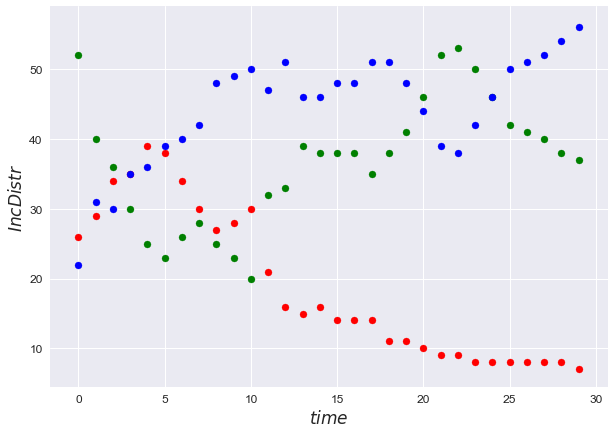

In [21]:
IncDistr = []
for d in range(uDays):
    IncDistr.append(np.unique(X[X.uDays==d+1].incl, return_counts= True)[1])
IncDistr = np.array(IncDistr)

plt.figure(figsize=(10,7))
plt.scatter(y=IncDistr[:,0] , x=range(uDays) , color = "red" )
plt.scatter(y=IncDistr[:,1] , x=range(uDays) , color = "green")
plt.scatter(y=IncDistr[:,2] , x=range(uDays) , color = "blue")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$time$', fontsize=17)
plt.ylabel('$IncDistr$', fontsize=17)

In [22]:
t=0
IncDistr_t=[]
for i in IncDistr:
    if( np.array_equal(i,IncDistr_t) ):
        print('Equilibrium time is '+ str(t))
        break
    else: 
        IncDistr_t=[j for j in i]
        t+=1

Equilibrium time is 16


In [44]:
# OPINION MATRIX

file = open( data + ".txt")
tit = file.readline()

Op = []

for l in file.readlines() :
    line = (l.split(","))
    line[companies-1] = line[companies-1][:-2]
    line = [float(i) for i in line]
    Op.append(line)
    
# O is a dictionary with: (key : day) (value : opinion matrix of that day)    
O = {}
index = 0
for d in range(uDays) :
    O[d+1] = np.array(Op[index:(index + users)])
    index = index + users

## 2) Visualize Network of Day 1

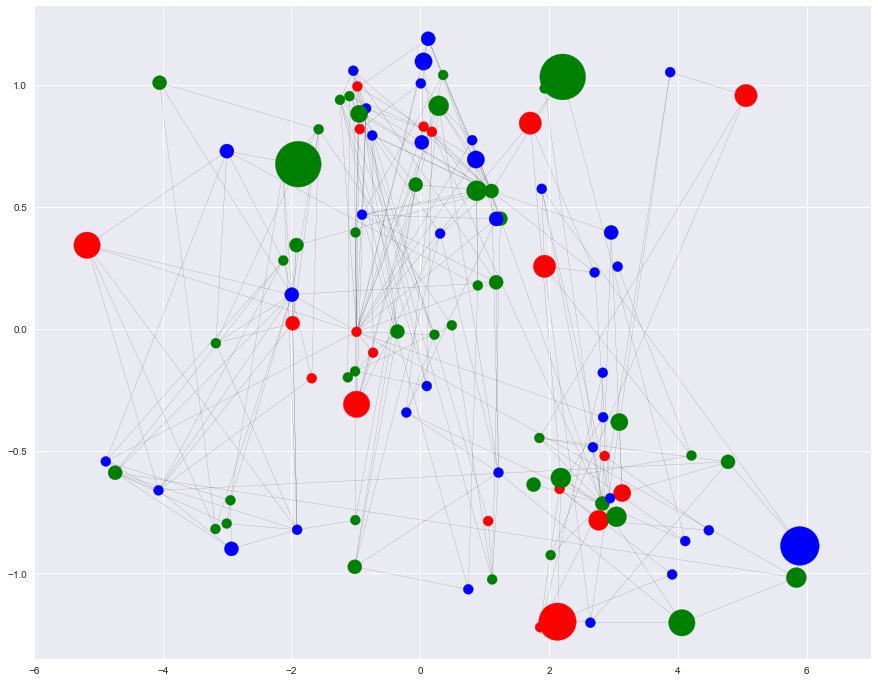

In [45]:
def Graphday(X , day) :
    G1 = nx.Graph()
    X1 = X[X.uDays == day]
    X1 = X1.sort_values(["ind"])

    for u in range(users) : 
            for n in nearest_neighbours[day][u] :
                G1.add_edge(u,n)

    pos1 = nx.circular_layout(G1)
    incols = np.array(["red","green","blue"])

    m = np.sum(O[day] , axis =1)
    for i in range(users) :
        pos1[i][0] = m[i] + np.random.normal(scale =0.2)
        pos1[i][1] += np.random.normal(scale =0.2)

    plt.figure(1,figsize=(15,12)) 
    plt.xlim( (np.min(m) -1 , np.max(m) +1) )
    nx.draw_networkx(G1,
                     node_size= X1.deg*100, 
                     pos = pos1,
                     node_color= incols[np.array(X1.incl +1)], 
                     with_labels=False,
                     width=0.1)
    
    
Graphday(X,1)
plt.show()

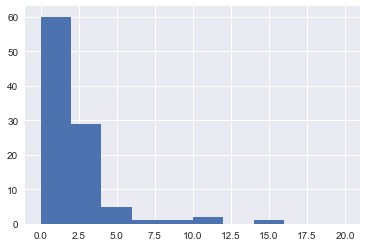

In [27]:
# DEGREE DISTRIBUTION
plt.hist(X1.deg, range=(0,20))
plt.show()

## 4) Equilibrium time in sum(opinions) vs time plot 

In [46]:
# defining dictiorary time: sum of opinions at that time
O_t={}
for i in O.keys():
    # list of vector to sum
    vec_list=[O[i][j] for j in range(users)]
    # summing vectors
    O_t[i] = np.sum( vec_list, axis=0 )
#O_t

Text(0,0.5,'$Opinions$')

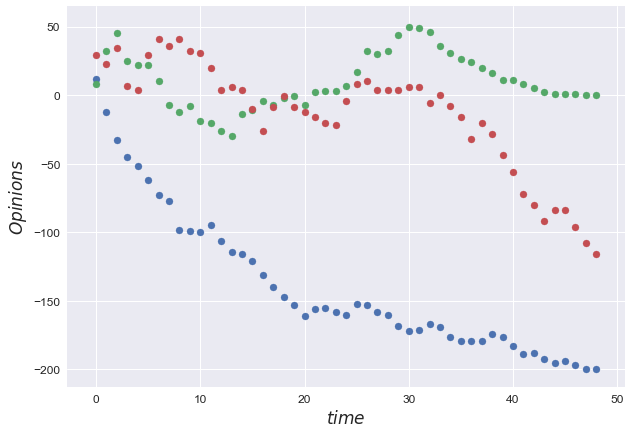

In [47]:
plt.figure(figsize=(10,7))
for i in range(companies):
    Y_comp=[O_t[j+1][i] for j in range(uDays)]
    plt.scatter( y=Y_comp , x=range(uDays) )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$time$', fontsize=17)
plt.ylabel('$Opinions$', fontsize=17)

In [48]:
t=0
for i in range(len(Y_comp)):
    #print(Y_comp[i])
    if( np.array_equal(Y_comp[i],Y_comp[i+6])):
        print('Equilibrium time is '+ str(t))
        break
    else: 
        t+=1

IndexError: list index out of range

##### 3) Histrogram opinions - companies

Text(0.5,0,'$Company-index$')

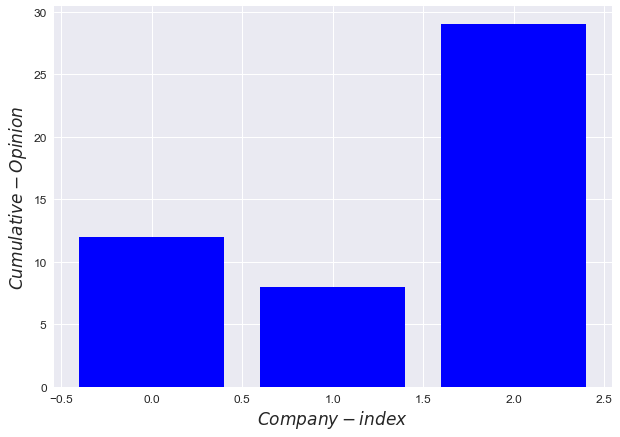

In [50]:
# CHOOSE DAY
day=1
plt.figure(figsize=(10,7))

colors=[]
for i in O_t[day]:
    if(i<0): colors.append('red')
    if(i>0): colors.append('blue')
        
# histogram
bar([i for i in range(companies)], list(O_t[day]), color=np.array(colors))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('$Cumulative-Opinion$', fontsize=17)
plt.xlabel('$Company-index$', fontsize=17)

In [33]:
feX = pd.Series( [np.array([1,2,3]) , np.array([4,6]), np.array([4,6,4])])
feX.name = "arrays"
feX

0    [1, 2, 3]
1       [4, 6]
2    [4, 6, 4]
Name: arrays, dtype: object